Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

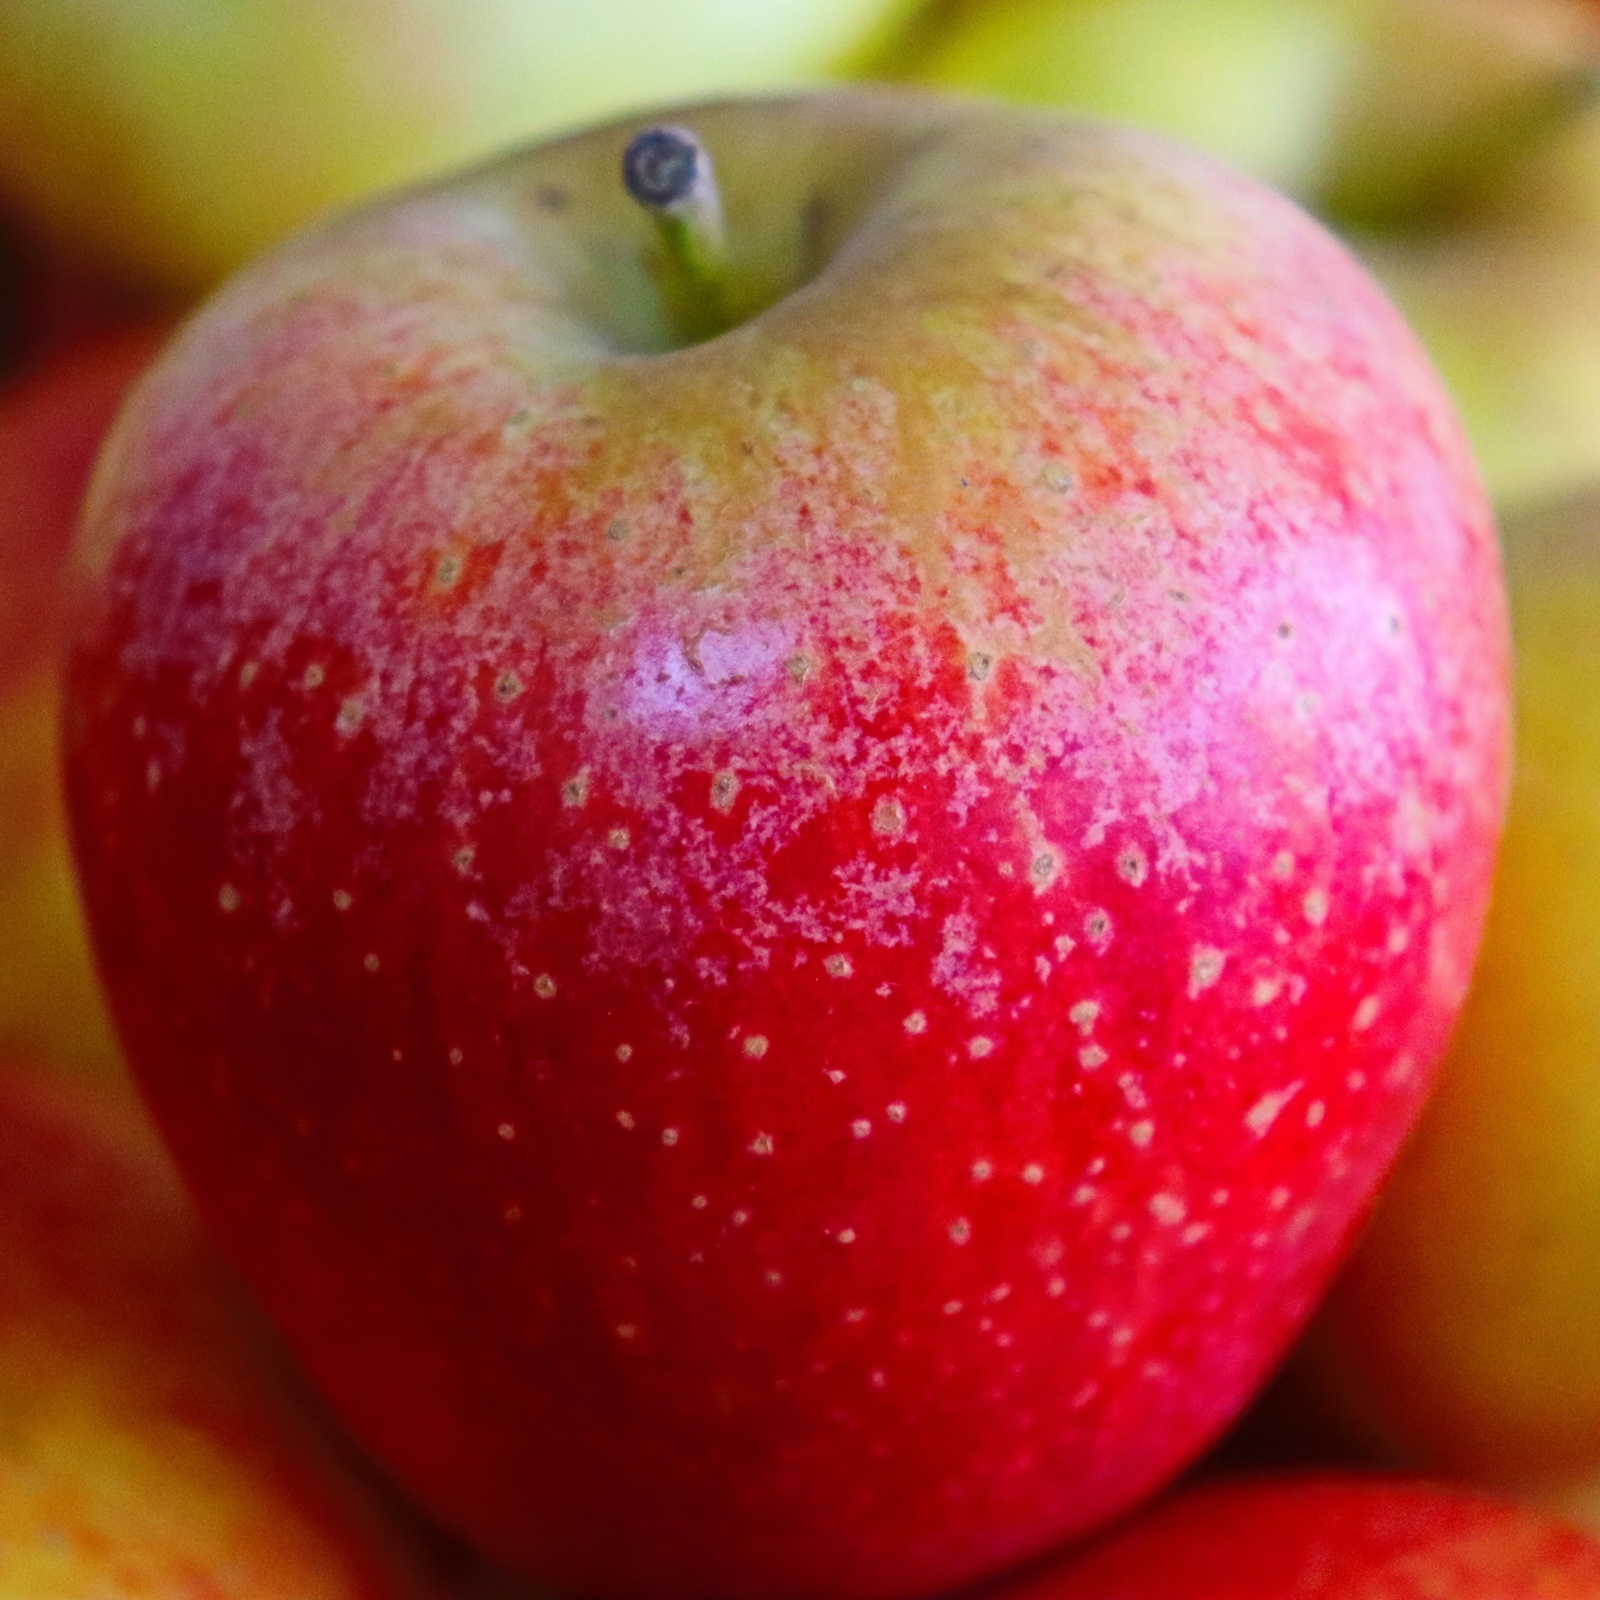

image_embeds torch.Size([1, 1024])


  0%|          | 0/4 [00:00<?, ?it/s]

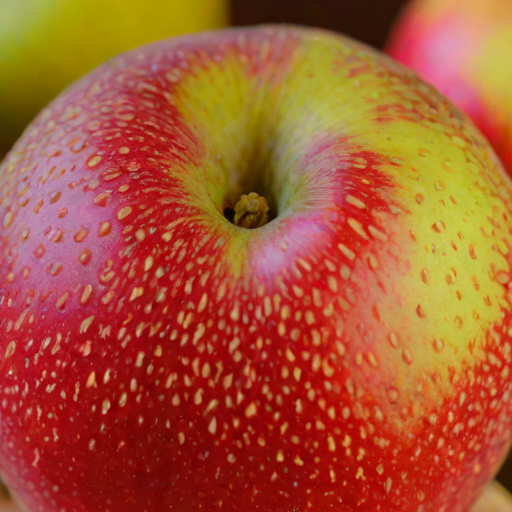

In [1]:
import os
from diffusers.pipelines.stable_diffusion_xl.pipeline_stable_diffusion_xl import *

@torch.no_grad()
@replace_example_docstring(EXAMPLE_DOC_STRING)
def generate_ip_adapter_embeds(
    self,
    prompt: Union[str, List[str]] = None,
    prompt_2: Optional[Union[str, List[str]]] = None,
    height: Optional[int] = None,
    width: Optional[int] = None,
    num_inference_steps: int = 50,
    timesteps: List[int] = None,
    denoising_end: Optional[float] = None,
    guidance_scale: float = 5.0,
    negative_prompt: Optional[Union[str, List[str]]] = None,
    negative_prompt_2: Optional[Union[str, List[str]]] = None,
    num_images_per_prompt: Optional[int] = 1,
    eta: float = 0.0,
    generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
    latents: Optional[torch.FloatTensor] = None,
    prompt_embeds: Optional[torch.FloatTensor] = None,
    negative_prompt_embeds: Optional[torch.FloatTensor] = None,
    pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
    negative_pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
    ip_adapter_image: Optional[PipelineImageInput] = None,
    ip_adapter_embeds: Optional[torch.FloatTensor] = None,
    output_type: Optional[str] = "pil",
    return_dict: bool = True,
    cross_attention_kwargs: Optional[Dict[str, Any]] = None,
    guidance_rescale: float = 0.0,
    original_size: Optional[Tuple[int, int]] = None,
    crops_coords_top_left: Tuple[int, int] = (0, 0),
    target_size: Optional[Tuple[int, int]] = None,
    negative_original_size: Optional[Tuple[int, int]] = None,
    negative_crops_coords_top_left: Tuple[int, int] = (0, 0),
    negative_target_size: Optional[Tuple[int, int]] = None,
    clip_skip: Optional[int] = None,
    callback_on_step_end: Optional[Callable[[int, int, Dict], None]] = None,
    callback_on_step_end_tensor_inputs: List[str] = ["latents"],
    **kwargs,
):
    r"""
    Function invoked when calling the pipeline for generation.

    Args:
        prompt (`str` or `List[str]`, *optional*):
            The prompt or prompts to guide the image generation. If not defined, one has to pass `prompt_embeds`.
            instead.
        prompt_2 (`str` or `List[str]`, *optional*):
            The prompt or prompts to be sent to the `tokenizer_2` and `text_encoder_2`. If not defined, `prompt` is
            used in both text-encoders
        height (`int`, *optional*, defaults to self.unet.config.sample_size * self.vae_scale_factor):
            The height in pixels of the generated image. This is set to 1024 by default for the best results.
            Anything below 512 pixels won't work well for
            [stabilityai/stable-diffusion-xl-base-1.0](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)
            and checkpoints that are not specifically fine-tuned on low resolutions.
        width (`int`, *optional*, defaults to self.unet.config.sample_size * self.vae_scale_factor):
            The width in pixels of the generated image. This is set to 1024 by default for the best results.
            Anything below 512 pixels won't work well for
            [stabilityai/stable-diffusion-xl-base-1.0](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0)
            and checkpoints that are not specifically fine-tuned on low resolutions.
        num_inference_steps (`int`, *optional*, defaults to 50):
            The number of denoising steps. More denoising steps usually lead to a higher quality image at the
            expense of slower inference.
        timesteps (`List[int]`, *optional*):
            Custom timesteps to use for the denoising process with schedulers which support a `timesteps` argument
            in their `set_timesteps` method. If not defined, the default behavior when `num_inference_steps` is
            passed will be used. Must be in descending order.
        denoising_end (`float`, *optional*):
            When specified, determines the fraction (between 0.0 and 1.0) of the total denoising process to be
            completed before it is intentionally prematurely terminated. As a result, the returned sample will
            still retain a substantial amount of noise as determined by the discrete timesteps selected by the
            scheduler. The denoising_end parameter should ideally be utilized when this pipeline forms a part of a
            "Mixture of Denoisers" multi-pipeline setup, as elaborated in [**Refining the Image
            Output**](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/stable_diffusion_xl#refining-the-image-output)
        guidance_scale (`float`, *optional*, defaults to 5.0):
            Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
            `guidance_scale` is defined as `w` of equation 2. of [Imagen
            Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
            1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
            usually at the expense of lower image quality.
        negative_prompt (`str` or `List[str]`, *optional*):
            The prompt or prompts not to guide the image generation. If not defined, one has to pass
            `negative_prompt_embeds` instead. Ignored when not using guidance (i.e., ignored if `guidance_scale` is
            less than `1`).
        negative_prompt_2 (`str` or `List[str]`, *optional*):
            The prompt or prompts not to guide the image generation to be sent to `tokenizer_2` and
            `text_encoder_2`. If not defined, `negative_prompt` is used in both text-encoders
        num_images_per_prompt (`int`, *optional*, defaults to 1):
            The number of images to generate per prompt.
        eta (`float`, *optional*, defaults to 0.0):
            Corresponds to parameter eta (η) in the DDIM paper: https://arxiv.org/abs/2010.02502. Only applies to
            [`schedulers.DDIMScheduler`], will be ignored for others.
        generator (`torch.Generator` or `List[torch.Generator]`, *optional*):
            One or a list of [torch generator(s)](https://pytorch.org/docs/stable/generated/torch.Generator.html)
            to make generation deterministic.
        latents (`torch.FloatTensor`, *optional*):
            Pre-generated noisy latents, sampled from a Gaussian distribution, to be used as inputs for image
            generation. Can be used to tweak the same generation with different prompts. If not provided, a latents
            tensor will ge generated by sampling using the supplied random `generator`.
        prompt_embeds (`torch.FloatTensor`, *optional*):
            Pre-generated text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting. If not
            provided, text embeddings will be generated from `prompt` input argument.
        negative_prompt_embeds (`torch.FloatTensor`, *optional*):
            Pre-generated negative text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt
            weighting. If not provided, negative_prompt_embeds will be generated from `negative_prompt` input
            argument.
        pooled_prompt_embeds (`torch.FloatTensor`, *optional*):
            Pre-generated pooled text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting.
            If not provided, pooled text embeddings will be generated from `prompt` input argument.
        negative_pooled_prompt_embeds (`torch.FloatTensor`, *optional*):
            Pre-generated negative pooled text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt
            weighting. If not provided, pooled negative_prompt_embeds will be generated from `negative_prompt`
            input argument.
        ip_adapter_image: (`PipelineImageInput`, *optional*): Optional image input to work with IP Adapters.
        ip_adapter_embeds: (`FloatTensor`, *optional*): Optional image embeddings to work with IP Adapters.
        output_type (`str`, *optional*, defaults to `"pil"`):
            The output format of the generate image. Choose between
            [PIL](https://pillow.readthedocs.io/en/stable/): `PIL.Image.Image` or `np.array`.
        return_dict (`bool`, *optional*, defaults to `True`):
            Whether or not to return a [`~pipelines.stable_diffusion_xl.StableDiffusionXLPipelineOutput`] instead
            of a plain tuple.
        cross_attention_kwargs (`dict`, *optional*):
            A kwargs dictionary that if specified is passed along to the `AttentionProcessor` as defined under
            `self.processor` in
            [diffusers.models.attention_processor](https://github.com/huggingface/diffusers/blob/main/src/diffusers/models/attention_processor.py).
        guidance_rescale (`float`, *optional*, defaults to 0.0):
            Guidance rescale factor proposed by [Common Diffusion Noise Schedules and Sample Steps are
            Flawed](https://arxiv.org/pdf/2305.08891.pdf) `guidance_scale` is defined as `φ` in equation 16. of
            [Common Diffusion Noise Schedules and Sample Steps are Flawed](https://arxiv.org/pdf/2305.08891.pdf).
            Guidance rescale factor should fix overexposure when using zero terminal SNR.
        original_size (`Tuple[int]`, *optional*, defaults to (1024, 1024)):
            If `original_size` is not the same as `target_size` the image will appear to be down- or upsampled.
            `original_size` defaults to `(height, width)` if not specified. Part of SDXL's micro-conditioning as
            explained in section 2.2 of
            [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952).
        crops_coords_top_left (`Tuple[int]`, *optional*, defaults to (0, 0)):
            `crops_coords_top_left` can be used to generate an image that appears to be "cropped" from the position
            `crops_coords_top_left` downwards. Favorable, well-centered images are usually achieved by setting
            `crops_coords_top_left` to (0, 0). Part of SDXL's micro-conditioning as explained in section 2.2 of
            [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952).
        target_size (`Tuple[int]`, *optional*, defaults to (1024, 1024)):
            For most cases, `target_size` should be set to the desired height and width of the generated image. If
            not specified it will default to `(height, width)`. Part of SDXL's micro-conditioning as explained in
            section 2.2 of [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952).
        negative_original_size (`Tuple[int]`, *optional*, defaults to (1024, 1024)):
            To negatively condition the generation process based on a specific image resolution. Part of SDXL's
            micro-conditioning as explained in section 2.2 of
            [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952). For more
            information, refer to this issue thread: https://github.com/huggingface/diffusers/issues/4208.
        negative_crops_coords_top_left (`Tuple[int]`, *optional*, defaults to (0, 0)):
            To negatively condition the generation process based on a specific crop coordinates. Part of SDXL's
            micro-conditioning as explained in section 2.2 of
            [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952). For more
            information, refer to this issue thread: https://github.com/huggingface/diffusers/issues/4208.
        negative_target_size (`Tuple[int]`, *optional*, defaults to (1024, 1024)):
            To negatively condition the generation process based on a target image resolution. It should be as same
            as the `target_size` for most cases. Part of SDXL's micro-conditioning as explained in section 2.2 of
            [https://huggingface.co/papers/2307.01952](https://huggingface.co/papers/2307.01952). For more
            information, refer to this issue thread: https://github.com/huggingface/diffusers/issues/4208.
        callback_on_step_end (`Callable`, *optional*):
            A function that calls at the end of each denoising steps during the inference. The function is called
            with the following arguments: `callback_on_step_end(self: DiffusionPipeline, step: int, timestep: int,
            callback_kwargs: Dict)`. `callback_kwargs` will include a list of all tensors as specified by
            `callback_on_step_end_tensor_inputs`.
        callback_on_step_end_tensor_inputs (`List`, *optional*):
            The list of tensor inputs for the `callback_on_step_end` function. The tensors specified in the list
            will be passed as `callback_kwargs` argument. You will only be able to include variables listed in the
            `._callback_tensor_inputs` attribute of your pipeline class.

    Examples:

    Returns:
        [`~pipelines.stable_diffusion_xl.StableDiffusionXLPipelineOutput`] or `tuple`:
        [`~pipelines.stable_diffusion_xl.StableDiffusionXLPipelineOutput`] if `return_dict` is True, otherwise a
        `tuple`. When returning a tuple, the first element is a list with the generated images.
    """

    callback = kwargs.pop("callback", None)
    callback_steps = kwargs.pop("callback_steps", None)

    if callback is not None:
        deprecate(
            "callback",
            "1.0.0",
            "Passing `callback` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`",
        )
    if callback_steps is not None:
        deprecate(
            "callback_steps",
            "1.0.0",
            "Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`",
        )

    # 0. Default height and width to unet
    height = height or self.default_sample_size * self.vae_scale_factor
    width = width or self.default_sample_size * self.vae_scale_factor

    original_size = original_size or (height, width)
    target_size = target_size or (height, width)

    # 1. Check inputs. Raise error if not correct
    self.check_inputs(
        prompt,
        prompt_2,
        height,
        width,
        callback_steps,
        negative_prompt,
        negative_prompt_2,
        prompt_embeds,
        negative_prompt_embeds,
        pooled_prompt_embeds,
        negative_pooled_prompt_embeds,
        callback_on_step_end_tensor_inputs,
    )

    self._guidance_scale = guidance_scale
    self._guidance_rescale = guidance_rescale
    self._clip_skip = clip_skip
    self._cross_attention_kwargs = cross_attention_kwargs
    self._denoising_end = denoising_end

    # 2. Define call parameters
    if prompt is not None and isinstance(prompt, str):
        batch_size = 1
    elif prompt is not None and isinstance(prompt, list):
        batch_size = len(prompt)
    else:
        batch_size = prompt_embeds.shape[0]

    device = self._execution_device

    # 3. Encode input prompt
    lora_scale = (
        self.cross_attention_kwargs.get("scale", None) if self.cross_attention_kwargs is not None else None
    )

    (
        prompt_embeds,
        negative_prompt_embeds,
        pooled_prompt_embeds,
        negative_pooled_prompt_embeds,
    ) = self.encode_prompt(
        prompt=prompt,
        prompt_2=prompt_2,
        device=device,
        num_images_per_prompt=num_images_per_prompt,
        do_classifier_free_guidance=self.do_classifier_free_guidance,
        negative_prompt=negative_prompt,
        negative_prompt_2=negative_prompt_2,
        prompt_embeds=prompt_embeds,
        negative_prompt_embeds=negative_prompt_embeds,
        pooled_prompt_embeds=pooled_prompt_embeds,
        negative_pooled_prompt_embeds=negative_pooled_prompt_embeds,
        lora_scale=lora_scale,
        clip_skip=self.clip_skip,
    )

    # 4. Prepare timesteps
    timesteps, num_inference_steps = retrieve_timesteps(self.scheduler, num_inference_steps, device, timesteps)

    # 5. Prepare latent variables
    num_channels_latents = self.unet.config.in_channels
    latents = self.prepare_latents(
        batch_size * num_images_per_prompt,
        num_channels_latents,
        height,
        width,
        prompt_embeds.dtype,
        device,
        generator,
        latents,
    )

    # 6. Prepare extra step kwargs. TODO: Logic should ideally just be moved out of the pipeline
    extra_step_kwargs = self.prepare_extra_step_kwargs(generator, eta)

    # 7. Prepare added time ids & embeddings
    add_text_embeds = pooled_prompt_embeds
    if self.text_encoder_2 is None:
        text_encoder_projection_dim = int(pooled_prompt_embeds.shape[-1])
    else:
        text_encoder_projection_dim = self.text_encoder_2.config.projection_dim

    add_time_ids = self._get_add_time_ids(
        original_size,
        crops_coords_top_left,
        target_size,
        dtype=prompt_embeds.dtype,
        text_encoder_projection_dim=text_encoder_projection_dim,
    )
    if negative_original_size is not None and negative_target_size is not None:
        negative_add_time_ids = self._get_add_time_ids(
            negative_original_size,
            negative_crops_coords_top_left,
            negative_target_size,
            dtype=prompt_embeds.dtype,
            text_encoder_projection_dim=text_encoder_projection_dim,
        )
    else:
        negative_add_time_ids = add_time_ids

    if self.do_classifier_free_guidance:
        prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0)
        add_text_embeds = torch.cat([negative_pooled_prompt_embeds, add_text_embeds], dim=0)
        add_time_ids = torch.cat([negative_add_time_ids, add_time_ids], dim=0)

    prompt_embeds = prompt_embeds.to(device)
    add_text_embeds = add_text_embeds.to(device)
    add_time_ids = add_time_ids.to(device).repeat(batch_size * num_images_per_prompt, 1)

    if ip_adapter_image is not None:
        image_embeds, negative_image_embeds = self.encode_image(ip_adapter_image, device, num_images_per_prompt)
        if self.do_classifier_free_guidance:
            image_embeds = torch.cat([negative_image_embeds, image_embeds])
            image_embeds = image_embeds.to(device)
    
    if ip_adapter_embeds is not None:
        image_embeds = ip_adapter_embeds.to(device=device, dtype=prompt_embeds.dtype)
        if self.do_classifier_free_guidance:
            negative_image_embeds = torch.zeros_like(image_embeds)
            image_embeds = torch.cat([negative_image_embeds, image_embeds])
            image_embeds = image_embeds.to(device)

    # 8. Denoising loop
    num_warmup_steps = max(len(timesteps) - num_inference_steps * self.scheduler.order, 0)

    # 8.1 Apply denoising_end
    if (
        self.denoising_end is not None
        and isinstance(self.denoising_end, float)
        and self.denoising_end > 0
        and self.denoising_end < 1
    ):
        discrete_timestep_cutoff = int(
            round(
                self.scheduler.config.num_train_timesteps
                - (self.denoising_end * self.scheduler.config.num_train_timesteps)
            )
        )
        num_inference_steps = len(list(filter(lambda ts: ts >= discrete_timestep_cutoff, timesteps)))
        timesteps = timesteps[:num_inference_steps]

    # 9. Optionally get Guidance Scale Embedding
    timestep_cond = None
    if self.unet.config.time_cond_proj_dim is not None:
        guidance_scale_tensor = torch.tensor(self.guidance_scale - 1).repeat(batch_size * num_images_per_prompt)
        timestep_cond = self.get_guidance_scale_embedding(
            guidance_scale_tensor, embedding_dim=self.unet.config.time_cond_proj_dim
        ).to(device=device, dtype=latents.dtype)

    self._num_timesteps = len(timesteps)
    with self.progress_bar(total=num_inference_steps) as progress_bar:
        for i, t in enumerate(timesteps):
            # expand the latents if we are doing classifier free guidance
            latent_model_input = torch.cat([latents] * 2) if self.do_classifier_free_guidance else latents

            latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

            # predict the noise residual
            added_cond_kwargs = {"text_embeds": add_text_embeds, "time_ids": add_time_ids}
            if ip_adapter_image is not None or ip_adapter_embeds is not None:
                added_cond_kwargs["image_embeds"] = image_embeds
            noise_pred = self.unet(
                latent_model_input,
                t,
                encoder_hidden_states=prompt_embeds,
                timestep_cond=timestep_cond,
                cross_attention_kwargs=self.cross_attention_kwargs,
                added_cond_kwargs=added_cond_kwargs,
                return_dict=False,
            )[0]

            # perform guidance
            if self.do_classifier_free_guidance:
                noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + self.guidance_scale * (noise_pred_text - noise_pred_uncond)

            if self.do_classifier_free_guidance and self.guidance_rescale > 0.0:
                # Based on 3.4. in https://arxiv.org/pdf/2305.08891.pdf
                noise_pred = rescale_noise_cfg(noise_pred, noise_pred_text, guidance_rescale=self.guidance_rescale)

            # compute the previous noisy sample x_t -> x_t-1
            latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs, return_dict=False)[0]

            if callback_on_step_end is not None:
                callback_kwargs = {}
                for k in callback_on_step_end_tensor_inputs:
                    callback_kwargs[k] = locals()[k]
                callback_outputs = callback_on_step_end(self, i, t, callback_kwargs)

                latents = callback_outputs.pop("latents", latents)
                prompt_embeds = callback_outputs.pop("prompt_embeds", prompt_embeds)
                negative_prompt_embeds = callback_outputs.pop("negative_prompt_embeds", negative_prompt_embeds)
                add_text_embeds = callback_outputs.pop("add_text_embeds", add_text_embeds)
                negative_pooled_prompt_embeds = callback_outputs.pop(
                    "negative_pooled_prompt_embeds", negative_pooled_prompt_embeds
                )
                add_time_ids = callback_outputs.pop("add_time_ids", add_time_ids)
                negative_add_time_ids = callback_outputs.pop("negative_add_time_ids", negative_add_time_ids)

            # call the callback, if provided
            if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
                progress_bar.update()
                if callback is not None and i % callback_steps == 0:
                    step_idx = i // getattr(self.scheduler, "order", 1)
                    callback(step_idx, t, latents)

            if XLA_AVAILABLE:
                xm.mark_step()

    if not output_type == "latent":
        # make sure the VAE is in float32 mode, as it overflows in float16
        needs_upcasting = self.vae.dtype == torch.float16 and self.vae.config.force_upcast

        if needs_upcasting:
            self.upcast_vae()
            latents = latents.to(next(iter(self.vae.post_quant_conv.parameters())).dtype)

        image = self.vae.decode(latents / self.vae.config.scaling_factor, return_dict=False)[0]

        # cast back to fp16 if needed
        if needs_upcasting:
            self.vae.to(dtype=torch.float16)
    else:
        image = latents

    if not output_type == "latent":
        # apply watermark if available
        if self.watermark is not None:
            image = self.watermark.apply_watermark(image)

        image = self.image_processor.postprocess(image, output_type=output_type)

    # Offload all models
    self.maybe_free_model_hooks()

    if not return_dict:
        return (image,)

    return StableDiffusionXLPipelineOutput(images=image)

def encode_image(image, image_encoder, feature_extractor, num_images_per_prompt=1, device='cuda'):
    dtype = next(image_encoder.parameters()).dtype

    if not isinstance(image, torch.Tensor):
        image = feature_extractor(image, return_tensors="pt").pixel_values # [1, 3, 224, 224]
    
    image = image.to(device=device, dtype=dtype)
    image_embeds = image_encoder(image).image_embeds # (1, 1024)
    image_embeds = image_embeds.repeat_interleave(num_images_per_prompt, dim=0) # (num_images_per_prompt, 1024)

    return image_embeds

class Generator4Embeds:

    def __init__(self, num_inference_steps=1, device='cuda') -> None:
        import os
        os.environ['http_proxy'] = 'http://10.16.35.10:13390' 
        os.environ['https_proxy'] = 'http://10.16.35.10:13390' 

        self.num_inference_steps = num_inference_steps
        self.dtype = torch.float16
        self.device = device

        # path = '/home/weichen/.cache/huggingface/hub/models--stabilityai--sdxl-turbo/snapshots/f4b0486b498f84668e828044de1d0c8ba486e05b'
        # path = "/home/ldy/Workspace/sdxl-turbo/f4b0486b498f84668e828044de1d0c8ba486e05b"
        pipe = DiffusionPipeline.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
        # pipe = DiffusionPipeline.from_pretrained(path, torch_dtype=torch.float16, variant="fp16")
        pipe.to(device)
        pipe.generate_ip_adapter_embeds = generate_ip_adapter_embeds.__get__(pipe)
        # load ip adapter
        pipe.load_ip_adapter(
            "h94/IP-Adapter", subfolder="sdxl_models", 
            weight_name="ip-adapter_sdxl_vit-h.safetensors", 
            torch_dtype=torch.float16)
        # set ip_adapter scale (defauld is 1)
        pipe.set_ip_adapter_scale(1)
        self.pipe = pipe

    def generate(self, image_embeds, text_prompt='', generator=None):
        image_embeds = image_embeds.to(device=self.device, dtype=self.dtype)
        pipe = self.pipe

        # generate image with image prompt - ip_adapter_embeds
        image = pipe.generate_ip_adapter_embeds(
            prompt=text_prompt, 
            ip_adapter_embeds=image_embeds, 
            num_inference_steps=self.num_inference_steps,
            guidance_scale=0.0,
            generator=generator,
        ).images[0]

        return image
        
        

if __name__ == "__main__":
    # import os
    # os.environ['http_proxy'] = 'http://10.16.35.10:13390' 
    # os.environ['https_proxy'] = 'http://10.16.35.10:13390' 
    # # path = '/home/weichen/.cache/huggingface/hub/models--stabilityai--sdxl-turbo/snapshots/f4b0486b498f84668e828044de1d0c8ba486e05b'

    # pipe = DiffusionPipeline.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
    # # pipe = DiffusionPipeline.from_pretrained(path, torch_dtype=torch.float16, variant="fp16")
    # pipe.to("cuda")

    # from IPython.display import Image, display

    # pipe.generate_ip_adapter_embeds = generate_ip_adapter_embeds.__get__(pipe)

    # prompt = ""

    # # # 1. Generate image
    # # image = pipe.generate_ip_adapter_embeds(
    # #     prompt=prompt, 
    # #     num_inference_steps=4,
    # #     guidance_scale=0.0,
    # # ).images[0]
    # # # show this image
    # # display(image)

    # # load ip adapter
    # pipe.load_ip_adapter(
    #     "h94/IP-Adapter", subfolder="sdxl_models", 
    #     weight_name="ip-adapter_sdxl_vit-h.safetensors", 
    #     torch_dtype=torch.float16)
    # pipe.set_ip_adapter_scale(0.5)


    # # 2. Load image encoder
    # from transformers import CLIPVisionModelWithProjection, CLIPImageProcessor

    # image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    #     "h94/IP-Adapter", 
    #     subfolder="models/image_encoder",
    #     torch_dtype=torch.float16,
    # ).to("cuda")
    # feature_extractor = CLIPImageProcessor()

    # from diffusers.utils import load_image
    # image_prompt = load_image("/mnt/dataset0/weichen/projects/visobj/proposals/mise/data/things-images/THINGSplus/images/images_resized/apple.jpg")
    # display(image_prompt)

    # # encode image
    # image_embeds = encode_image(image_prompt, image_encoder, feature_extractor, 1, "cuda")

    # # 3. Generate image with image prompt - ip_adapter_image
    # pipe.image_encoder = image_encoder
    # image = pipe.generate_ip_adapter_embeds(
    #     prompt=prompt, 
    #     ip_adapter_image=image_prompt, 
    #     num_inference_steps=4,
    #     guidance_scale=0.0,
    # ).images[0]
    # # show this image
    # display(image)


    # # 4. Generate image with image prompt - ip_adapter_embeds
    # image = pipe.generate_ip_adapter_embeds(
    #     prompt=prompt, 
    #     ip_adapter_embeds=image_embeds, 
    #     num_inference_steps=4,
    #     guidance_scale=0.0,
    # ).images[0]
    # # show this image
    # display(image)
    
    device = "cuda:3" if torch.cuda.is_available() else "cpu"
    from IPython.display import Image, display
    generator = Generator4Embeds(num_inference_steps=4, device=device)

    # 2. Load image encoder
    # from transformers import CLIPVisionModelWithProjection, CLIPImageProcessor

    # image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    #     "h94/IP-Adapter", 
    #     subfolder="models/image_encoder",
    #     torch_dtype=torch.float16,
    # ).to("cuda")
    # feature_extractor = CLIPImageProcessor()

    # 2.2 Load image encoder from open_clip
    import open_clip
    image_encoder, preprocess_train, feature_extractor = open_clip.create_model_and_transforms(
        'ViT-H-14', pretrained='laion2b_s32b_b79k', precision='fp16', device=device)

    from diffusers.utils import load_image
    image_prompt = load_image("/mnt/dataset0/weichen/projects/visobj/proposals/mise/data/things-images/THINGSplus/images/images_resized/apple.jpg")
    # image_prompt = load_image("https://th.bing.com/th/id/OIP.BGo1V-YM46ZrqSo5N_edWAHaE7?rs=1&pid=ImgDetMain")

    display(image_prompt)

    # encode image
    # image_embeds = encode_image(image_prompt, image_encoder, feature_extractor, 1, "cuda")
    image_embeds = image_encoder.encode_image(feature_extractor(image_prompt)[None, ...].to(device, dtype=torch.float16))
    print("image_embeds", image_embeds.shape)
    image = generator.generate(image_embeds)
    display(image)

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import clip
from torch.nn import functional as F
import torch.nn as nn
from torchvision import transforms
from PIL import Image
train = False
classes = None
pictures= None

def load_data():
    data_list = []
    label_list = []
    texts = []
    images = []
    
    if train:
        text_directory = "/home/ldy/Workspace/THINGS/images_set/training_images"  
    else:
        text_directory = "/home/ldy/Workspace/THINGS/images_set/test_images"
    # 获取该路径下的所有目录
    dirnames = [d for d in os.listdir(text_directory) if os.path.isdir(os.path.join(text_directory, d))]
    dirnames.sort()
    
    if classes is not None:
        dirnames = [dirnames[i] for i in classes]

    for dir in dirnames:
        # 尝试找到第一个'_'的位置
        try:
            idx = dir.index('_')
            description = dir[idx+1:]  # 从第一个'_'之后取得所有内容
        except ValueError:
            print(f"Skipped: {dir} due to no '_' found.")
            continue
            
        new_description = f"{description}"
        texts.append(new_description)

    if train:
        img_directory = "/home/ldy/Workspace/THINGS/images_set/training_images"  # 请将其替换为你的新地址
    else:
        img_directory ="/home/ldy/Workspace/THINGS/images_set/test_images"
    
    all_folders = [d for d in os.listdir(img_directory) if os.path.isdir(os.path.join(img_directory, d))]
    all_folders.sort()  # 保证文件夹的顺序

    if classes is not None and pictures is not None:
        images = []  # 初始化images列表
        for i in range(len(classes)):
            class_idx = classes[i]
            pic_idx = pictures[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                if pic_idx < len(all_images):
                    images.append(os.path.join(folder_path, all_images[pic_idx]))
    elif classes is not None and pictures is None:
        images = []  # 初始化images列表
        for i in range(len(classes)):
            class_idx = classes[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                images.extend(os.path.join(folder_path, img) for img in all_images)
    elif classes is None:
        images = []  # 初始化images列表
        for folder in all_folders:
            folder_path = os.path.join(img_directory, folder)
            all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            all_images.sort()  
            images.extend(os.path.join(folder_path, img) for img in all_images)
    else:
        # 处理其他情况，比如 classes 和 pictures 长度不匹配
        print("Error")
    return texts, images
texts, images = load_data()
# images

In [11]:
import os

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.nn import functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader


os.environ["WANDB_API_KEY"] = "KEY"
os.environ["WANDB_MODE"] = 'offline'
from itertools import combinations

import clip
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import tqdm
from new_cls_eegdatasets_NICE_leaveone import EEGDataset
from eegencoder import eeg_encoder
from einops.layers.torch import Rearrange, Reduce
from lavis.models.clip_models.loss import ClipLoss
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, Dataset
import random
from utils import wandb_logger
from torch import Tensor
import math
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # 计算额外的一个元素以适应奇数维度
        div_term = torch.exp(torch.arange(0, d_model + 1, 2).float() * (-math.log(10000.0) / d_model))
        # 使用切片确保不会溢出
        pe[:, 0::2] = torch.sin(position * div_term[:d_model // 2 + 1])
        pe[:, 1::2] = torch.cos(position * div_term[:d_model // 2])

        self.register_buffer('pe', pe)

    def forward(self, x):
        pe = self.pe[:x.size(0), :].unsqueeze(1).repeat(1, x.size(1), 1)
        x = x + pe
        return x




class EEGAttention(nn.Module):
    def __init__(self, channel, d_model, nhead):
        super(EEGAttention, self).__init__()
        self.pos_encoder = PositionalEncoding(d_model)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=1)
        self.channel = channel
        self.d_model = d_model

    def forward(self, src):
        src = src.permute(2, 0, 1)  # Change shape to [time_length, batch_size, channel]
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        return output.permute(1, 2, 0)  # Change shape back to [batch_size, channel, time_length]

class PatchEmbedding(nn.Module):
    def __init__(self, emb_size=40):
        super().__init__()
        # revised from shallownet
        self.tsconv = nn.Sequential(
            nn.Conv2d(1, 40, (1, 25), (1, 1)),
            nn.AvgPool2d((1, 51), (1, 5)),
            nn.BatchNorm2d(40),
            nn.ELU(),
            nn.Conv2d(40, 40, (63, 1), (1, 1)),
            nn.BatchNorm2d(40),
            nn.ELU(),
            nn.Dropout(0.5),
        )

        self.projection = nn.Sequential(
            nn.Conv2d(40, emb_size, (1, 1), stride=(1, 1)),  
            Rearrange('b e (h) (w) -> b (h w) e'),
        )

    def forward(self, x: Tensor) -> Tensor:
        # b, _, _, _ = x.shape
        x = x.unsqueeze(1)     
        # print("x", x.shape)   
        x = self.tsconv(x)
        # print("tsconv", x.shape)   
        x = self.projection(x)
        # print("projection", x.shape)  
        return x


class ResidualAdd(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x


class FlattenHead(nn.Sequential):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x.contiguous().view(x.size(0), -1)
        return x


class Enc_eeg(nn.Sequential):
    def __init__(self, emb_size=40, **kwargs):
        super().__init__(
            PatchEmbedding(emb_size),
            FlattenHead()
        )

        
class Proj_eeg(nn.Sequential):
    def __init__(self, embedding_dim=1440, proj_dim=1024, drop_proj=0.5):
        super().__init__(
            nn.Linear(embedding_dim, proj_dim),
            ResidualAdd(nn.Sequential(
                nn.GELU(),
                nn.Linear(proj_dim, proj_dim),
                nn.Dropout(drop_proj),
            )),
            nn.LayerNorm(proj_dim),
        )


class Proj_img(nn.Sequential):
    def __init__(self, embedding_dim=1024, proj_dim=1024, drop_proj=0.3):
        super().__init__(
            nn.Linear(embedding_dim, proj_dim),
            ResidualAdd(nn.Sequential(
                nn.GELU(),
                nn.Linear(proj_dim, proj_dim),
                nn.Dropout(drop_proj),
            )),
            nn.LayerNorm(proj_dim),
        )
    def forward(self, x):
        return x 

class ATM_S(nn.Module):    
    def __init__(self, num_channels=63, sequence_length=250, num_subjects=1, num_features=64, num_latents=1024, num_blocks=1):
        super(ATM_S, self).__init__()
        self.attention_model = EEGAttention(num_channels, num_channels, nhead=1)   
        self.subject_wise_linear = nn.ModuleList([nn.Linear(sequence_length, sequence_length) for _ in range(num_subjects)])
        self.enc_eeg = Enc_eeg()
        self.proj_eeg = Proj_eeg()        
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))
        self.loss_func = ClipLoss()       
         
    def forward(self, x):
        x = self.attention_model(x)
        # print(f'After attention shape: {x.shape}')
         
        x = self.subject_wise_linear[0](x)
        # print(f'After subject-specific linear transformation shape: {x.shape}')
        eeg_embedding = self.enc_eeg(x)
        
        out = self.proj_eeg(eeg_embedding)
        return out  
    
    

def get_eegfeatures(sub, eegmodel, dataloader, device, text_features_all, img_features_all, k):
    eegmodel.eval()
    text_features_all = text_features_all.to(device).float()
    img_features_all = img_features_all.to(device).float()
    total_loss = 0
    correct = 0
    total = 0
    alpha =0.9
    top5_correct = 0
    top5_correct_count = 0
    # 获取所有独特的类别
    all_labels = set(range(text_features_all.size(0)))
    top5_acc = 0
    mse_loss_fn = nn.MSELoss()
    ridge_lambda = 0.1
    save_features = True
    features_list = []  # List to store features
    with torch.no_grad():
        for batch_idx, (eeg_data, labels, text, text_features, img, img_features) in enumerate(dataloader):
            eeg_data = eeg_data.to(device)
            print("eeg_data", eeg_data.shape)
            text_features = text_features.to(device).float()
            labels = labels.to(device)
            img_features = img_features.to(device).float()
            eeg_features = eegmodel(eeg_data).float()
            features_list.append(eeg_features)
            logit_scale = eegmodel.logit_scale 
                   
            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("eeg_features", eeg_features.shape)
            # print(torch.std(eeg_features, dim=-1))
            # print(torch.std(img_features, dim=-1))
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            img_loss = eegmodel.loss_func(eeg_features, img_features, logit_scale)
            text_loss = eegmodel.loss_func(eeg_features, text_features, logit_scale)
            contrastive_loss = img_loss
            # loss = img_loss + text_loss

            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("text_loss", text_loss)
            # print("img_loss", img_loss)
            # print("regress_loss", regress_loss)            
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            loss = alpha * regress_loss *10 + (1 - alpha) * contrastive_loss*10
            # print("loss", loss)
            total_loss += loss.item()
            
            for idx, label in enumerate(labels):
                # 先从除了正确类别之外的类别中选择 k-1 个
                possible_classes = list(all_labels - {label.item()})
                selected_classes = random.sample(possible_classes, k-1) + [label.item()]
                selected_img_features = img_features_all[selected_classes]
                
                # 计算对应的 logits
                logits_img = logit_scale * eeg_features[idx] @ selected_img_features.T
                # logits_text = logit_scale * eeg_features[idx] @ selected_text_features.T
                # logits_single = (logits_text + logits_img) / 2.0
                logits_single = logits_img
                # print("logits_single", logits_single.shape)
                # 获取预测的类别
                # predicted_label = selected_classes[torch.argmax(logits_single).item()]
                predicted_label = selected_classes[torch.argmax(logits_single).item()] # (n_batch, ) \in {0, 1, ..., n_cls-1}
                if predicted_label == label.item():
                    correct += 1        
                total += 1
        if save_features:
            features_tensor = torch.cat(features_list, dim=0)
            print("features_tensor", features_tensor.shape)
            torch.save(features_tensor.cpu(), f"ATM_S_eeg_features_{sub}.pt")  # Save features as .pt file
    average_loss = total_loss / (batch_idx+1)
    accuracy = correct / total
    return average_loss, accuracy, labels


config = {
"data_path": "/home/ldy/Workspace/THINGS/Preprocessed_data_250Hz",
"project": "train_pos_img_text_rep",
"entity": "sustech_rethinkingbci",
"name": "lr=3e-4_img_pos_pro_eeg",
"lr": 3e-4,
"epochs": 50,
"batch_size": 1024,
"logger": True
}


# 获取数据路径
data_path = config['data_path']
train_dataset = EEGDataset(data_path, subjects= ['sub-08'], train=True)
train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=False, num_workers=0)

text_features_test_all = train_dataset.text_features
img_features_test_all = train_dataset.img_features


# 模型和优化器定义
eeg_model = ATM_S()
print('number of parameters:', sum([p.numel() for p in eeg_model.parameters()]))

# 确定使用的设备
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

eeg_model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/contrast/sub-08/01-30_00-44/40.pth"))
# model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/sub-01_30.pth"))
eeg_model.to(device)
sub = 'sub-08'
test_loss, test_accuracy,labels = get_eegfeatures(sub, eeg_model, train_loader, device, text_features_test_all, img_features_test_all,k=200)
print(f" - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    

self.subjects ['sub-08']
exclude_subject None
data_tensor torch.Size([66160, 63, 250])
Data tensor shape: torch.Size([66160, 63, 250]), label tensor shape: torch.Size([66160]), text length: 1654, image length: 16540
number of parameters: 3246741
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch.Size([1024, 63, 250])
eeg_data torch

In [15]:
import os

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.nn import functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader


os.environ["WANDB_API_KEY"] = "KEY"
os.environ["WANDB_MODE"] = 'offline'
from itertools import combinations

import clip
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import tqdm
from new_cls_eegdatasets_NICE_leaveone import EEGDataset
from eegencoder import eeg_encoder
from einops.layers.torch import Rearrange, Reduce
from lavis.models.clip_models.loss import ClipLoss
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, Dataset
import random
from utils import wandb_logger
from torch import Tensor
import math
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        # 计算额外的一个元素以适应奇数维度
        div_term = torch.exp(torch.arange(0, d_model + 1, 2).float() * (-math.log(10000.0) / d_model))
        # 使用切片确保不会溢出
        pe[:, 0::2] = torch.sin(position * div_term[:d_model // 2 + 1])
        pe[:, 1::2] = torch.cos(position * div_term[:d_model // 2])

        self.register_buffer('pe', pe)

    def forward(self, x):
        pe = self.pe[:x.size(0), :].unsqueeze(1).repeat(1, x.size(1), 1)
        x = x + pe
        return x




class EEGAttention(nn.Module):
    def __init__(self, channel, d_model, nhead):
        super(EEGAttention, self).__init__()
        self.pos_encoder = PositionalEncoding(d_model)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=1)
        self.channel = channel
        self.d_model = d_model

    def forward(self, src):
        src = src.permute(2, 0, 1)  # Change shape to [time_length, batch_size, channel]
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        return output.permute(1, 2, 0)  # Change shape back to [batch_size, channel, time_length]

class PatchEmbedding(nn.Module):
    def __init__(self, emb_size=40):
        super().__init__()
        # revised from shallownet
        self.tsconv = nn.Sequential(
            nn.Conv2d(1, 40, (1, 25), (1, 1)),
            nn.AvgPool2d((1, 51), (1, 5)),
            nn.BatchNorm2d(40),
            nn.ELU(),
            nn.Conv2d(40, 40, (63, 1), (1, 1)),
            nn.BatchNorm2d(40),
            nn.ELU(),
            nn.Dropout(0.5),
        )

        self.projection = nn.Sequential(
            nn.Conv2d(40, emb_size, (1, 1), stride=(1, 1)),  
            Rearrange('b e (h) (w) -> b (h w) e'),
        )

    def forward(self, x: Tensor) -> Tensor:
        # b, _, _, _ = x.shape
        x = x.unsqueeze(1)     
        # print("x", x.shape)   
        x = self.tsconv(x)
        # print("tsconv", x.shape)   
        x = self.projection(x)
        # print("projection", x.shape)  
        return x


class ResidualAdd(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x


class FlattenHead(nn.Sequential):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x.contiguous().view(x.size(0), -1)
        return x


class Enc_eeg(nn.Sequential):
    def __init__(self, emb_size=40, **kwargs):
        super().__init__(
            PatchEmbedding(emb_size),
            FlattenHead()
        )

        
class Proj_eeg(nn.Sequential):
    def __init__(self, embedding_dim=1440, proj_dim=1024, drop_proj=0.5):
        super().__init__(
            nn.Linear(embedding_dim, proj_dim),
            ResidualAdd(nn.Sequential(
                nn.GELU(),
                nn.Linear(proj_dim, proj_dim),
                nn.Dropout(drop_proj),
            )),
            nn.LayerNorm(proj_dim),
        )


class Proj_img(nn.Sequential):
    def __init__(self, embedding_dim=1024, proj_dim=1024, drop_proj=0.3):
        super().__init__(
            nn.Linear(embedding_dim, proj_dim),
            ResidualAdd(nn.Sequential(
                nn.GELU(),
                nn.Linear(proj_dim, proj_dim),
                nn.Dropout(drop_proj),
            )),
            nn.LayerNorm(proj_dim),
        )
    def forward(self, x):
        return x 

class ATM_S(nn.Module):    
    def __init__(self, num_channels=63, sequence_length=250, num_subjects=1, num_features=64, num_latents=1024, num_blocks=1):
        super(ATM_S, self).__init__()
        self.attention_model = EEGAttention(num_channels, num_channels, nhead=1)   
        self.subject_wise_linear = nn.ModuleList([nn.Linear(sequence_length, sequence_length) for _ in range(num_subjects)])
        self.enc_eeg = Enc_eeg()
        self.proj_eeg = Proj_eeg()        
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))
        self.loss_func = ClipLoss()       
         
    def forward(self, x):
        x = self.attention_model(x)
        # print(f'After attention shape: {x.shape}')
         
        x = self.subject_wise_linear[0](x)
        # print(f'After subject-specific linear transformation shape: {x.shape}')
        eeg_embedding = self.enc_eeg(x)
        
        out = self.proj_eeg(eeg_embedding)
        return out  
    
    

def get_eegfeatures(sub, eegmodel, dataloader, device, text_features_all, img_features_all, k):
    eegmodel.eval()
    text_features_all = text_features_all.to(device).float()
    img_features_all = img_features_all.to(device).float()
    total_loss = 0
    correct = 0
    total = 0
    alpha =0.9
    top5_correct = 0
    top5_correct_count = 0
    # 获取所有独特的类别
    all_labels = set(range(text_features_all.size(0)))
    top5_acc = 0
    mse_loss_fn = nn.MSELoss()
    ridge_lambda = 0.1
    save_features = True
    features_list = []  # List to store features
    with torch.no_grad():
        for batch_idx, (eeg_data, labels, text, text_features, img, img_features) in enumerate(dataloader):
            eeg_data = eeg_data.to(device)
            # print("eeg_data", eeg_data.shape)
            text_features = text_features.to(device).float()
            labels = labels.to(device)
            img_features = img_features.to(device).float()
            eeg_features = eegmodel(eeg_data).float()
            features_list.append(eeg_features)
            logit_scale = eegmodel.logit_scale 
                   
            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("eeg_features", eeg_features.shape)
            # print(torch.std(eeg_features, dim=-1))
            # print(torch.std(img_features, dim=-1))
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            img_loss = eegmodel.loss_func(eeg_features, img_features, logit_scale)
            text_loss = eegmodel.loss_func(eeg_features, text_features, logit_scale)
            contrastive_loss = img_loss
            # loss = img_loss + text_loss

            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("text_loss", text_loss)
            # print("img_loss", img_loss)
            # print("regress_loss", regress_loss)            
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            loss = alpha * regress_loss *10 + (1 - alpha) * contrastive_loss*10
            # print("loss", loss)
            total_loss += loss.item()
            
            for idx, label in enumerate(labels):
                # 先从除了正确类别之外的类别中选择 k-1 个
                possible_classes = list(all_labels - {label.item()})
                selected_classes = random.sample(possible_classes, k-1) + [label.item()]
                selected_img_features = img_features_all[selected_classes]
                
                # 计算对应的 logits
                logits_img = logit_scale * eeg_features[idx] @ selected_img_features.T
                # logits_text = logit_scale * eeg_features[idx] @ selected_text_features.T
                # logits_single = (logits_text + logits_img) / 2.0
                logits_single = logits_img
                # print("logits_single", logits_single.shape)
                # 获取预测的类别
                # predicted_label = selected_classes[torch.argmax(logits_single).item()]
                predicted_label = selected_classes[torch.argmax(logits_single).item()] # (n_batch, ) \in {0, 1, ..., n_cls-1}
                if predicted_label == label.item():
                    correct += 1        
                total += 1
        if save_features:
            features_tensor = torch.cat(features_list, dim=0)
            print("features_tensor", features_tensor.shape)
            torch.save(features_tensor.cpu(), f"ATM_S_eeg_features_{sub}_test.pt")  # Save features as .pt file
    average_loss = total_loss / (batch_idx+1)
    accuracy = correct / total
    return average_loss, accuracy, labels


config = {
"data_path": "/home/ldy/Workspace/THINGS/Preprocessed_data_250Hz",
"project": "train_pos_img_text_rep",
"entity": "sustech_rethinkingbci",
"name": "lr=3e-4_img_pos_pro_eeg",
"lr": 3e-4,
"epochs": 50,
"batch_size": 1,
"logger": True
}


# 获取数据路径
data_path = config['data_path']
test_dataset = EEGDataset(data_path, subjects= ['sub-08'], train=False)
test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False, num_workers=0)

text_features_test_all = train_dataset.text_features
img_features_test_all = train_dataset.img_features


# 模型和优化器定义
eeg_model = ATM_S()
print('number of parameters:', sum([p.numel() for p in eeg_model.parameters()]))

# 确定使用的设备
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

eeg_model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/contrast/sub-08/01-30_00-44/40.pth"))
# model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/sub-01_30.pth"))
eeg_model.to(device)
sub = 'sub-08'
test_loss, test_accuracy,labels = get_eegfeatures(sub, eeg_model, test_loader, device, text_features_test_all, img_features_test_all,k=200)
print(f" - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    

self.subjects ['sub-08']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200
number of parameters: 3246741
features_tensor torch.Size([200, 1024])
 - Test Loss: 0.6082, Test Accuracy: 0.0000


In [ ]:
import os

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.nn import functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader


os.environ["WANDB_API_KEY"] = "KEY"
os.environ["WANDB_MODE"] = 'offline'
from itertools import combinations

import clip
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import tqdm
from new_cls_eegdatasets import EEGDataset
from eegencoder import eeg_encoder
from einops.layers.torch import Rearrange, Reduce
from lavis.models.clip_models.loss import ClipLoss
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, Dataset
import random
from utils import wandb_logger

def make_block(h_c, h_l,dropout_rate=0.25):
    block = nn.Sequential(
        nn.LayerNorm(h_l),
        nn.Linear(h_l, h_l), 
        nn.GELU(),
        nn.Dropout(dropout_rate),  
        Rearrange('B C L->B L C'),
        nn.LayerNorm(h_c),
        nn.Linear(h_c, h_c), 
        nn.GELU(),
        nn.Dropout(dropout_rate),  
        Rearrange('B L C->B C L'),
    )
    return block

class Projector(nn.Module):

    def __init__(self, in_features, h_dim=(64, 1024), n_hidden_layer=2,dropout_rate=0.25):
        # in_features: (c, l)
        super().__init__()
        c, l = in_features
        h_c, h_l = h_dim
        c_o, l_o = 1, 1024

        self.input_layer = nn.Sequential(
            nn.LayerNorm(l),
            nn.Linear(l, h_l), 
            nn.GELU(),
            nn.Dropout(dropout_rate),  
            Rearrange('B C L->B L C'),
            nn.LayerNorm(c),
            nn.Linear(c, h_c), 
            nn.GELU(),
            nn.Dropout(dropout_rate),  
            Rearrange('B L C->B C L'),
        )
        
        self.output_layer = nn.Sequential(
            nn.LayerNorm(h_l),
            nn.Linear(h_l, l_o), 
            nn.GELU(),
            nn.Dropout(dropout_rate),  
            Rearrange('B C L->B L C'),
            nn.LayerNorm(h_c),
            nn.Linear(h_c, c_o), 
            nn.GELU(),
            nn.Dropout(dropout_rate),  
            Rearrange('B L C->B (C L)'),
        )
        
        self.blocks = nn.Sequential(*[
            make_block(h_c, h_l) for _ in range(n_hidden_layer)
        ])
        
        self.projector = nn.Sequential(*[
            self.input_layer,
            self.blocks,
            self.output_layer,
        ])

        # self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1/0.01))
                
        self.loss_func = ClipLoss()
    
    def forward(self, eeg_embeds):
        
        eeg_embeds = self.projector(eeg_embeds)
        # print("eeg_embeds")
        # print(eeg_embeds.shape)
        # eeg_features = F.normalize(eeg_embeds, dim=-1)
        return eeg_embeds

    

def get_eegfeatures(model, regression, dataloader, device, text_features_all, img_features_all, k):
    model.eval()
    text_features_all = text_features_all.to(device).float()
    img_features_all = img_features_all.to(device).float()
    total_loss = 0
    correct = 0
    total = 0
    alpha = 0.99
    top5_correct = 0
    top5_correct_count = 0
    # 获取所有独特的类别
    all_labels = set(range(text_features_all.size(0)))
    top5_acc = 0
    mse_loss_fn = nn.MSELoss()
    ridge_lambda = 0.1
    features_list = []  # List to store features
    save_features = True
    with torch.no_grad():
        for batch_idx, (eeg_data, labels, text, text_features, img, img_features) in enumerate(dataloader):
            eeg_data = eeg_data.to(device)
            text_features = text_features.to(device).float()
            labels = labels.to(device)
            img_features = img_features.to(device).float()
            eeg_features = model(eeg_data).float()
            features_list.append(eeg_features)
            # img_features_outputs = regression(eeg_features).float()
            logit_scale = model.logit_scale 
            # print(eeg_features.type, text_features.type, img_features.type)                    
            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            loss = regress_loss 
            total_loss += loss.item()
            
            for idx, label in enumerate(labels):
                # 先从除了正确类别之外的类别中选择 k-1 个
                possible_classes = list(all_labels - {label.item()})
                selected_classes = random.sample(possible_classes, k-1) + [label.item()]
                selected_img_features = img_features_all[selected_classes]
                
                # 计算对应的 logits
                logits_img = logit_scale * eeg_features[idx] @ selected_img_features.T
                # logits_text = logit_scale * eeg_features[idx] @ selected_text_features.T
                # logits_single = (logits_text + logits_img) / 2.0
                logits_single = logits_img
                # print("logits_single", logits_single.shape)
                # 获取预测的类别
                # predicted_label = selected_classes[torch.argmax(logits_single).item()]
                predicted_label = selected_classes[torch.argmax(logits_single).item()] # (n_batch, ) \in {0, 1, ..., n_cls-1}
                if predicted_label == label.item():
                    correct += 1        
                total += 1
        if save_features:
            features_tensor = torch.cat(features_list, dim=0)
            torch.save(features_tensor, "eeg_features_20.pt")  # Save features as .pt file
    average_loss = total_loss / (batch_idx+1)
    accuracy = correct / total
    return average_loss, accuracy, labels

class RidgeRegression(nn.Module):
    def __init__(self, input_size=1024, output_size=1024):
        super(RidgeRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

config = {
"data_path": "/home/ldy/Workspace/THINGS/EEG/osfstorage-archive",
"project": "train_pos_img_text_rep",
"entity": "sustech_rethinkingbci",
"name": "lr=3e-4_img_pos_pro_eeg",
"lr": 3e-4,
"epochs": 50,
"batch_size": 16,
"logger": True
}


# 获取数据路径
data_path = config['data_path']
train_dataset = EEGDataset(data_path, subjects = ['sub-08'],train=True)
train_loader = DataLoader(test_dataset, batch_size=200, shuffle=False, num_workers=0, drop_last=True)

text_features_test_all = test_dataset.text_features
img_features_test_all = test_dataset.img_features


# 模型和优化器定义
in_features = (63, 80) #输入数据形状
model = Projector(in_features)
regression = RidgeRegression()
print('number of parameters:', sum([p.numel() for p in model.parameters()]))

# 确定使用的设备
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

# model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/contrast/sub-01/01-17_18-46/49.pth"))
model.load_state_dict(torch.load("/home/ldy/Workspace/Reconstruction/models/sub-01_30.pth"))
model.to(device)
regression.to(device)
test_loss, test_accuracy,labels = get_eegfeatures(model, regression, test_loader, device, text_features_test_all, img_features_test_all,k=1654)
print(f" - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    

In [13]:
model_type = 'ViT-H-14'
if classes is None and pictures is None:
    features_filename = os.path.join('/home/ldy/Workspace/THINGS/CLIP', f'{model_type}_features_train.pt') if train else os.path.join('/home/ldy/Workspace/THINGS/CLIP', f'{model_type}_features_test.pt')
    
    if os.path.exists(features_filename) :
        saved_features = torch.load(features_filename)
        text_features = saved_features['text_features']
        img_features = saved_features['img_features']
eeg_features = torch.load("eeg_features.pt")
img_features.shape
# text_features.shape
# eeg_features.shape

torch.Size([200, 1024])

In [14]:
eeg_features.shape
print(torch.std(eeg_features, dim=-1))

tensor([0.2997, 0.3386, 0.3248, 0.3027, 0.3160, 0.3132, 0.3253, 0.3149, 0.3056,
        0.2967, 0.3204, 0.3326, 0.3034, 0.3050, 0.3211, 0.3131, 0.3011, 0.3156,
        0.3101, 0.3044, 0.3006, 0.3135, 0.3123, 0.3242, 0.2928, 0.3061, 0.3206,
        0.3158, 0.3322, 0.2997, 0.3037, 0.3095, 0.3267, 0.3180, 0.3062, 0.2987,
        0.3073, 0.3343, 0.3282, 0.3062, 0.3004, 0.3028, 0.3206, 0.3009, 0.3082,
        0.3237, 0.3198, 0.3274, 0.3060, 0.3187, 0.3220, 0.3052, 0.3111, 0.3196,
        0.3174, 0.3032, 0.3056, 0.3168, 0.3039, 0.3214, 0.3102, 0.3099, 0.3212,
        0.3213, 0.3250, 0.3165, 0.2965, 0.3113, 0.3147, 0.3339, 0.3245, 0.3267,
        0.3026, 0.2878, 0.2982, 0.3002, 0.3335, 0.3103, 0.3055, 0.3150, 0.3298,
        0.3234, 0.3131, 0.2906, 0.3082, 0.3197, 0.3348, 0.3300, 0.3171, 0.3255,
        0.3023, 0.3085, 0.3034, 0.3117, 0.2903, 0.3055, 0.3188, 0.3088, 0.3053,
        0.3024, 0.3430, 0.2895, 0.3031, 0.3062, 0.3070, 0.3314, 0.3131, 0.3045,
        0.3043, 0.3120, 0.3259, 0.3113, 

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

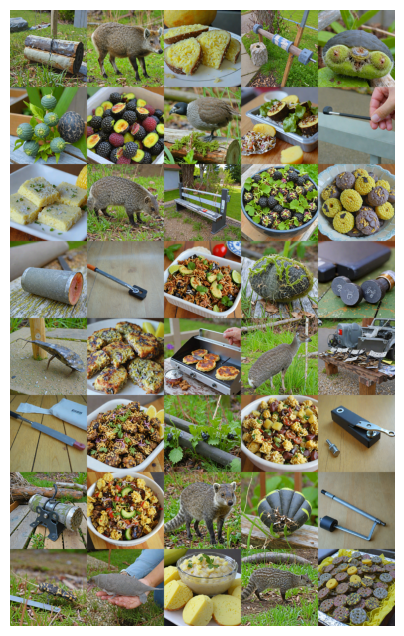

In [15]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Assuming generator is a model that generates images from EEG embeddings
# Make sure generator.generate() returns a PIL Image

generated_images = []

for index, eeg_embedding in enumerate(eeg_features[:5]):
    # Generate the image directly
    img = generator.generate(eeg_embedding.unsqueeze(0))
    generated_images.append(img)

# Determine the number of rows and columns for the grid
num_images = len(generated_images)
num_columns = 5
num_rows = (num_images + num_columns - 1) // num_columns  # Round up division

# Calculate the dimensions of the big image
single_width = max(img.width for img in generated_images)
single_height = max(img.height for img in generated_images)
total_width = single_width * num_columns
total_height = single_height * num_rows

# Create a new big image with enough space for the grid
big_image = Image.new('RGB', (total_width, total_height))

# Paste each PIL image onto the big image, in a grid
x_offset = 0
y_offset = 0
for index, img in enumerate(generated_images):
    if index % num_columns == 0 and index != 0:  # Start a new row after every 'num_columns' images
        x_offset = 0
        y_offset += single_height
    big_image.paste(img, (x_offset, y_offset))
    x_offset += single_width

# Display the concatenated image

plt.figure(figsize=(12, 8))
plt.imshow(big_image)
plt.axis('off')
plt.savefig("eeg")
plt.show()


In [7]:
img_features.shape
print(torch.std(img_features, dim=-1))

tensor([0.6788, 0.6844, 0.6519, 0.6911, 0.7236, 0.6705, 0.7329, 0.6857, 0.6702,
        0.6793, 0.6760, 0.6799, 0.6896, 0.6620, 0.6641, 0.7861, 0.6819, 0.7043,
        0.6864, 0.6757, 0.6858, 0.6653, 0.7033, 0.7135, 0.6616, 0.6984, 0.7040,
        0.7081, 0.7252, 0.6639, 0.6602, 0.7740, 0.6696, 0.7215, 0.6992, 0.7019,
        0.6659, 0.7039, 0.7029, 0.7507, 0.7266, 0.6600, 0.6751, 0.6806, 0.7117,
        0.7189, 0.7737, 0.7431, 0.7144, 0.6959, 0.7482, 0.6962, 0.7010, 0.7274,
        0.7170, 0.7393, 0.7261, 0.7066, 0.6566, 0.6657, 0.6282, 0.6980, 0.7290,
        0.6804, 0.6758, 0.6378, 0.6920, 0.6514, 0.6876, 0.6722, 0.7150, 0.6645,
        0.6729, 0.6987, 0.6817, 0.7100, 0.6670, 0.6697, 0.6627, 0.6902, 0.6726,
        0.8028, 0.6647, 0.6879, 0.6938, 0.6975, 0.7295, 0.7403, 0.7081, 0.6961,
        0.6557, 0.6671, 0.7120, 0.6542, 0.7189, 0.7174, 0.7127, 0.7619, 0.6370,
        0.7602, 0.7085, 0.7471, 0.7112, 0.6633, 0.7033, 0.6847, 0.7128, 0.7057,
        0.7546, 0.6753, 0.7238, 0.6449, 

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

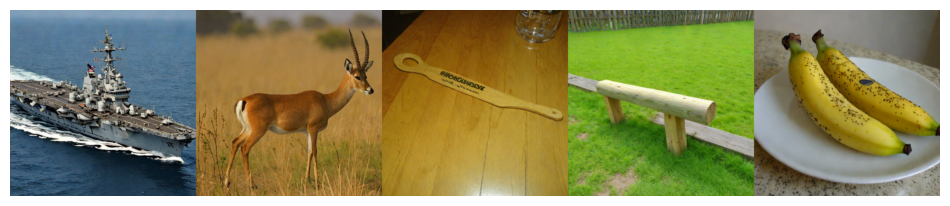

In [8]:
from diffusers.utils import load_image
import matplotlib.pyplot as plt
from PIL import Image

# Assuming 'img_features' is a tensor or array-like object containing your embeddings
# and 'generator.generate()' method returns a PIL Image object.

# Generate images for embeddings sampled every 10 steps
generated_images = []
for image_embed in img_features[:5]:
    # Generate the image directly
    img = generator.generate(image_embed.unsqueeze(0))  # Ensure that image_embed is in the correct shape for generator
    generated_images.append(img)

# Assuming all images have the same dimensions
img_width = generated_images[0].width
img_height = generated_images[0].height

# Define number of columns for the grid
num_columns = 5
num_rows = len(generated_images) // num_columns + (len(generated_images) % num_columns > 0)

# Create a new big image with 'RGB' mode to ensure color
big_image = Image.new('RGB', (img_width * num_columns, img_height * num_rows))

# Paste each PIL image onto the big image in grid format
x_offset = 0
y_offset = 0
for i, img in enumerate(generated_images):
    if i % num_columns == 0 and i != 0:  # Move to the next row after every 'num_columns' images
        x_offset = 0
        y_offset += img_height
    big_image.paste(img, (x_offset, y_offset))
    x_offset += img_width

# Display the concatenated image
plt.figure(figsize=(12, 8))
plt.imshow(big_image)
plt.axis('off')
plt.show()


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import clip
from torch.nn import functional as F
import torch.nn as nn
from torchvision import transforms
from PIL import Image
train = False
classes = None
pictures= None
config_path = "data_config.json"
import json
with open(config_path, "r") as config_file:
    config = json.load(config_file)
data_path = config["data_path"]
features_path = config["features_path"]
img_directory_training = config["img_directory_training"]
img_directory_test = config["img_directory_test"]

from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# processor = BlipProcessor.from_pretrained("/home/geek/Workspace/BCI/Code/Decoding/BLIP/blip-image-captioning-base")
# model = BlipForConditionalGeneration.from_pretrained("/home/geek/Workspace/BCI/Code/Decoding/BLIP/blip-image-captioning-base", torch_dtype=torch.float16).to("cuda")
def load_data():
    data_list = []
    label_list = []
    texts = []
    images = []
    blip_texts = []
    if train:
        text_directory = img_directory_training
    else:
        text_directory = img_directory_test
    # 获取该路径下的所有目录
    dirnames = [d for d in os.listdir(text_directory) if os.path.isdir(os.path.join(text_directory, d))]
    dirnames.sort()
    
    if classes is not None:
        dirnames = [dirnames[i] for i in classes]

    for dir in dirnames:
        # 尝试找到第一个'_'的位置
        try:
            idx = dir.index('_')
            description = dir[idx+1:]  # 从第一个'_'之后取得所有内容
        except ValueError:
            print(f"Skipped: {dir} due to no '_' found.")
            continue
            
        new_description = f"{description}"
        texts.append(new_description)

    if train:
        img_directory = img_directory_training
    else:
        img_directory =img_directory_test
    
    all_folders = [d for d in os.listdir(img_directory) if os.path.isdir(os.path.join(img_directory, d))]
    all_folders.sort()  # 保证文件夹的顺序

    if classes is not None and pictures is not None:
        images = []  # 初始化images列表
        for i in range(len(classes)):
            class_idx = classes[i]
            pic_idx = pictures[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                if pic_idx < len(all_images):
                    images.append(os.path.join(folder_path, all_images[pic_idx]))                                                        

    elif classes is not None and pictures is None:
        images = []  # 初始化images列表
        for i in range(len(classes)):
            class_idx = classes[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                images.extend(os.path.join(folder_path, img) for img in all_images)
                
    elif classes is None:
        images = []  # 初始化images列表
        for idx, folder in enumerate(all_folders):
            folder_path = os.path.join(img_directory, folder)
            all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            all_images.sort()  
            images.extend(os.path.join(folder_path, img) for img in all_images)
            raw_image = Image.open(os.path.join(folder_path, all_images[0])).convert("RGB")
            # print(raw_image)
            # conditional image captioning
            text = [i.join(" ") for i in texts[idx].split("_")]
            # inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)

            # out = model.generate(**inputs)
            # blip_text = processor.decode(out[0], skip_special_tokens=True)
            # print(blip_text)
            # blip_texts.append(blip_text)
    else:
        # 处理其他情况，比如 classes 和 pictures 长度不匹配
        print("Error")
    return texts, blip_texts, images
texts, blip_texts, images = load_data()
# texts[3]
# images.shape
# blip_texts

In [10]:
len(images)

200

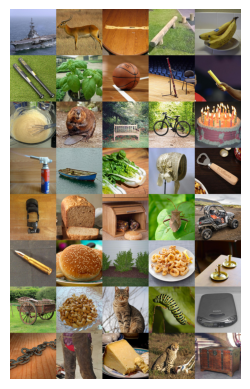

In [11]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
def create_collage(images, k, cols=5):
    """
    Create a collage of the first k images in the given list.
    Args:
    images (list): List of image file paths.
    k (int): Number of images to include in the collage.
    cols (int): Number of columns in the collage.

    Returns:
    PIL.Image: The created collage image.
    """
    # Limit the number of images to k
    images = images

    # Load images
    loaded_images = [PILImage.open(img_path) for img_path in images]

    # Determine the size of each individual image
    widths, heights = zip(*(i.size for i in loaded_images))

    # Calculate total collage size
    max_width = max(widths)
    max_height = max(heights)
    total_width = max_width * cols
    rows = k // cols + (1 if k % cols != 0 else 0)
    total_height = max_height * rows

    # Create blank canvas
    collage = PILImage.new('RGB', (total_width, total_height))

    # Paste images into collage
    x_offset = 0
    y_offset = 0
    for i, img in enumerate(loaded_images):
        collage.paste(img, (x_offset, y_offset))
        x_offset += max_width
        if (i + 1) % cols == 0:
            x_offset = 0
            y_offset += max_height

    return collage

# Example usage
# Assume 'images' is a list of image file paths
# images = ["path_to_image1.jpg", "path_to_image2.jpg", "path_to_image3.jpg", ...]  # Replace with actual paths
k = 40  # Number of images to include in the collage
collage_image = create_collage(images, k)
plt.imshow(collage_image)
plt.axis('off')
plt.show()
